# This is Jeopardy!

#### Project Goals

We will work to write several functions that investigate a dataset of _Jeopardy!_ questions and answers. Filter the dataset for topics that you're interested in, compute the average difficulty of those questions, and train to become the next Jeopardy champion!

## Project Requirements

1. We've provided a csv file containing data about the game show _Jeopardy!_ in a file named `jeopardy.csv`. Load the data into a DataFrame and investigate its contents. Try to print out specific columns.

In [16]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
jeopardy = pd.read_csv('jeopardy.csv')
jeopardy = jeopardy.rename(columns={'Show Number': 'Show Number', ' Air Date': 'Air Date', ' Round': 'Round', ' Category': 'Category', ' Value':'Value', ' Question':'Question', ' Answer': 'Answer'})

2. Write a function that filters the dataset for questions that contains all of the words in a list of words. For example, when the list `["King", "England"]` was passed to our function, the function returned a DataFrame of 49 rows. Every row had the strings `"King"` and `"England"` somewhere in its `" Question"`.

   Test your function by printing out the column containing the question of each row of the dataset.

In [17]:
questions = jeopardy['Question']

def return_question_words(data, string_rows):
    questions = data['Question']
    questions_selected = questions.apply(lambda x: any(word.lower() in str(x).lower() for word in string_rows))
    return questions[questions_selected].head(49)
print(return_question_words(jeopardy, ["Dom Pedro"]))

43812                              1822: Dom Pedro is crowned emperor of this Western Hemisphere nation
117217    The tomb of Dom Pedro I stands on the grounds of Ipiranga Park in this largest Brazilian city
179947    In this country's "War of the Two Brothers", Dom Miguel capitulated to Dom Pedro May 26, 1834
180984                               In 1822 Dom Pedro declared Brazil's independence from this country
Name: Question, dtype: object


3. Test your original function with a few different sets of words to try to find some ways your function breaks. Edit your function so it is more robust.

   For example, think about capitalization. We probably want to find questions that contain the word `"King"` or `"king"`.
   
   You may also want to check to make sure you don't find rows that contain substrings of your given words. For example, our function found a question that didn't contain the word `"king"`, however it did contain the word `"viking"` &mdash; it found the `"king"` inside `"viking"`. Note that this also comes with some drawbacks &mdash; you would no longer find questions that contained words like `"England's"`.

In [18]:
quantity = return_question_words(jeopardy, ["king"])
print(quantity.count())

49


4. We may want to eventually compute aggregate statistics, like `.mean()` on the `" Value"` column. But right now, the values in that column are strings. Convert the`" Value"` column to floats. If you'd like to, you can create a new column with float values.

   While most of the values in the `" Value"` column represent a dollar amount as a string, note that some do not &mdash; these values will need to be handled differently!

   Now that you can filter the dataset of question, use your new column that contains the float values of each question to find the "difficulty" of certain topics. For example, what is the average value of questions that contain the word `"King"`?
   
   Make sure to use the dataset that contains the float values as the dataset you use in your filtering function.

In [19]:
import numpy as np
jeopardy['Value']  = jeopardy['Value'].apply(lambda x: np.nan if x == 'no value' else x.replace(',', '').replace('$', '') ) 

In [20]:
value = []
for i in range(len(jeopardy.Value)):
    appender = jeopardy.Value[i]
    appender = float(appender)
    value.append(appender)
print(value[0:10])

jeopardy['Value'] = value

[200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 400.0, 400.0, 400.0, 400.0]


5. Write a function that returns the count of unique question in a dataset.

In [21]:
def count_of_questions(list_words):
    count_ammount = return_question_words(jeopardy, list_words).count()
    return count_ammount
print(count_of_questions(['Brazil']))

49


6. Quiz Game

In [22]:
def question_and_answer():
    questions_list = jeopardy.Question.tolist()
    answer_list = jeopardy.Answer.tolist()
    rand_num = np.random.randint(0, len(questions_list))
    question = questions_list[rand_num]
    print(question)
    response = input("What is the answer? :")
    if response == str(answer_list[rand_num]):
        print("Nice! You are right!")
        print(answer_list[rand_num])
    else:
        print("Wrong answer")
        print(answer_list[rand_num])

question_and_answer()

1942: Ugarte, Sascha, Major Strasser
Wrong answer
Casablanca


7. Bar correlation with 'History' category

107384 3 3631 105912
216930


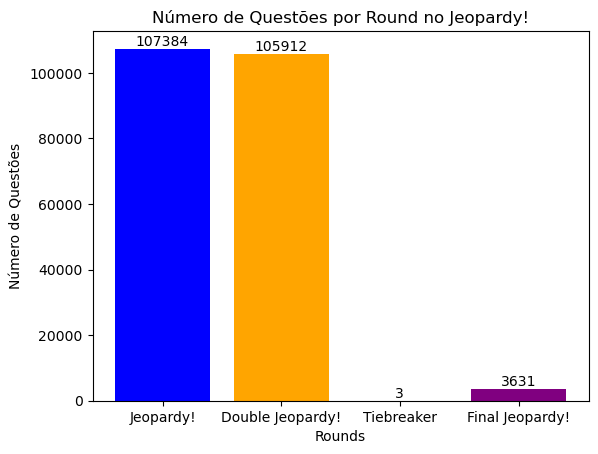

In [23]:
''' Is there a connection between the round and the category? Are you more likely to find certain categories, 
like `"Literature"` in Single Jeopardy or Double Jeopardy? '''
# print(jeopardy.Category.nunique())
# print(jeopardy.Round.nunique())
# print(jeopardy.Round.unique())

# History is what we will analyse

history_in_each_round = jeopardy.groupby("Round")["Category"].apply(list)
# print(history_in_each_round)

jeopardy_count =len(history_in_each_round['Jeopardy!'])
double_count = len(history_in_each_round['Double Jeopardy!'])
tiebrk_count = len(history_in_each_round['Tiebreaker'])
final_count = len(history_in_each_round['Final Jeopardy!'])
print(jeopardy_count, tiebrk_count, final_count, double_count)

dict_list_count = [jeopardy_count, double_count, tiebrk_count, final_count]
count_general = jeopardy_count + double_count + tiebrk_count + final_count
print(count_general)

import matplotlib.pyplot as plt

labels = ['Jeopardy!', 'Double Jeopardy!', 'Tiebreaker', 'Final Jeopardy!']
bars = plt.bar(labels, dict_list_count, color=['blue', 'orange', 'red', 'purple'])
plt.bar_label(bars, fmt='%d', fontsize=10)
plt.xlabel("Rounds")
plt.ylabel("Número de Questões")
plt.title("Número de Questões por Round no Jeopardy!")
plt.show()